<a href="https://colab.research.google.com/github/sharifovrus/Block-Inc.-SQ-/blob/main/SQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [13]:
data = pd.read_csv('SQ.csv')  # Preloaded historical data as CSV file
data['Date'] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to a datetime object
data.set_index('Date', inplace=True)  # Set 'Date' as the DataFrame index
data.sort_index(ascending=True, inplace=True)  # Sort the DataFrame by date in ascending order

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-04 to 2023-08-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
 6   Target     251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,88.150002,90.669998,86.830002,89.699997,89.699997,22719400
2022-08-05,83.650002,93.190002,82.877998,87.730003,87.730003,31022600
2022-08-08,88.050003,91.800003,84.870003,85.500000,85.500000,19001500
2022-08-09,84.180000,84.870003,79.949997,81.129997,81.129997,13287000
2022-08-10,86.760002,89.029999,84.419998,88.839996,88.839996,16527800


Text(0.5, 1.0, 'SQ Price')

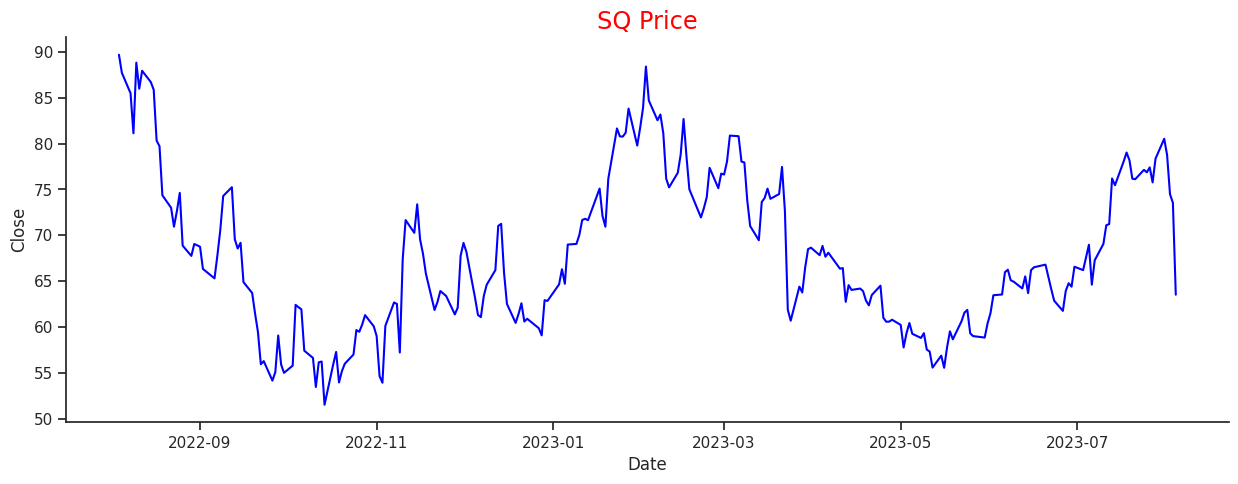

In [17]:
plt.figure(figsize=(15,5))
sns.set_style("ticks")
sns.lineplot(data, x="Date", y='Close', color='blue')
sns.despine()
plt.title("SQ Price", size='x-large', color='red')

In [18]:
# Create a new column 'Target' which will contain the target values to predict
data['Target'] = data['Close'].shift(-1)
# Drop the last row since it will have NaN for the target
data.dropna(inplace=True)

In [19]:
X = data[['Close']].values
y = data['Target'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.569257043144368


In [22]:
last_price = data['Close'].iloc[-1]
future_price = model.predict([[last_price]])
print(f"Predicted future price: {future_price[0]}")

Predicted future price: 73.0097172766389
